Variable Description:

Column Description

age -                   Age of the patient
gender -                Gender of the patient - (0,1) - (Male, Female)
chest_pain -            It refers to the chest pain experienced by the patient -(0,1,2,3)
rest_bps  -             Blood pressure of the patient while resting(in mm/Hg)
cholesterol-            Patient's cholesterol level (in mg/dl)
fasting_blood_sugar -   The blood sugar of the patient while fasting
rest_ecg -              Potassium level (0,1,2)
thalach-                The patient’s maximum heart rate
exer_angina -           It refers to exercise-induced angina - (1=Yes, 0=No)
Problem Statement –     Decision Tree
old_peak -              It is the ST depression induced by exercise relative to rest(ST relates to the position on ECG plots)
slope -                 It refers to the slope of the peak of the exercise ST-Segment-(0,1,2)
ca -                    Number of major vessels - (0,1,2,3,4)
thalassemia -           It refers to thalassemia which is a blood disorder - (0,1,2,3)
target-                 The patient has heart disease or not - (1=Yes, 0=No)

# Plotting Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics for Classification technique

In [2]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
df=pd.read_csv(r'C:\Users\SHUBHAM SHARMA\Desktop\Heart Disease Prediction\Dataset\Dataset\HeartDisease.csv')

In [4]:
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [7]:
df.shape

(303, 14)

Out of 14 features, we have 13 int types and only one with the float data types.
this dataset doesn’t hold any missing values.

In [8]:
df['gender']=df['gender'].replace({1:'F',
                                  0:'M'})

change male dtype as object and convert o,1 into male and female

In [9]:
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,F,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,F,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,M,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,F,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,M,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,M,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,F,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,F,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,F,0,130,131,0,1,115,1,1.2,1,1,3,0


# Statistical 

In [10]:
df.describe()

,age,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


It is always better to check the correlation between the features so that we can analyze that which feature is negatively correlated and which is positively correlated so, Let’s check the correlation between various features.

In [11]:
df.describe(include="object")

,gender
count,303
unique,2
top,F
freq,207


It is clearly shows that the data contain more female's than male

In [12]:
df.corr()

,age,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
chest_pain,-0.068653,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slope,-0.168814,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877


Four feature( “chest_pain”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature.
Other features are negatively correlated with the target feature.

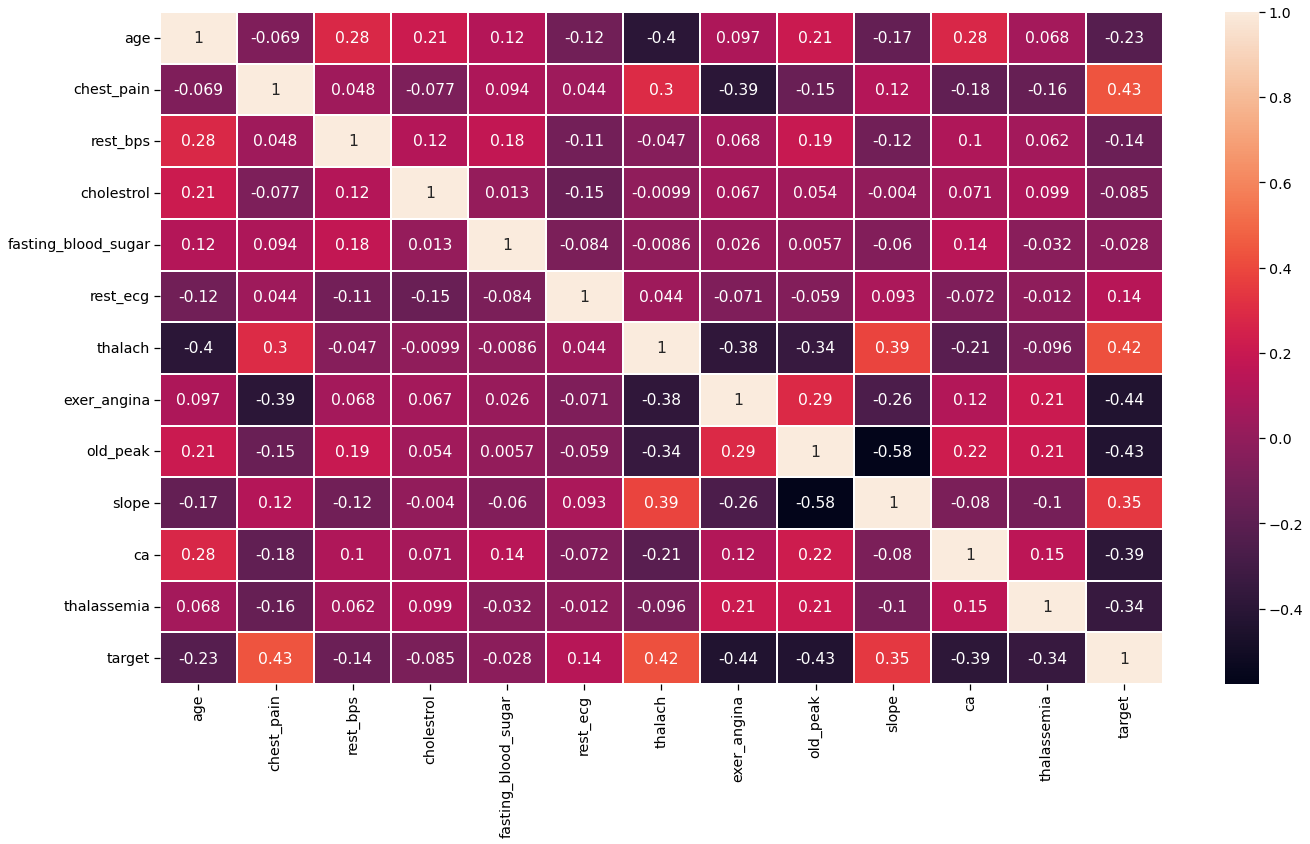

In [13]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df.corr(),annot=True,linewidth =2)
plt.tight_layout()

# Univeriate and Bivariate Analysis

1.Age Analysis

<AxesSubplot:xlabel='age', ylabel='Density'>

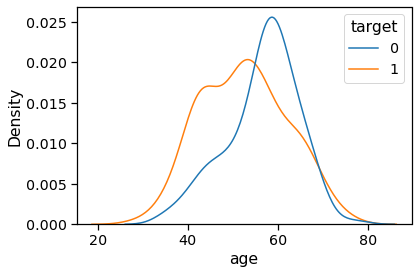

In [14]:
sns.kdeplot(df['age'],hue=df['target'])

<AxesSubplot:>

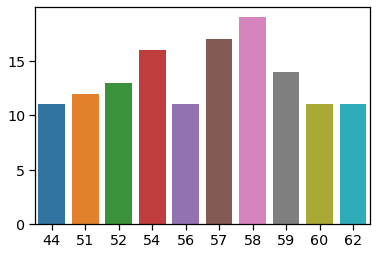

In [15]:
sns.barplot(x=df['age'].value_counts()[:10].index,y=df.age.value_counts()[:10].values)

the 58 age column has the highest frequency

In [16]:
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [17]:
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]


<AxesSubplot:>

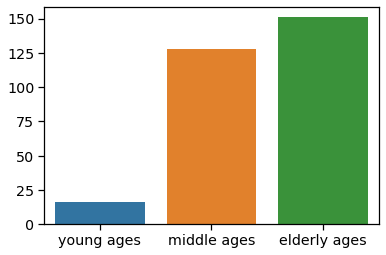

In [18]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])

we can see that elder people are the most affected by heart disease and young ones are the least affected.

([<matplotlib.patches.Wedge at 0x4a8abda2e0>,
 [Text(1.0840703088664039, 0.18652497268274834, 'young ages'),
  Text(-0.14599805795280732, 1.0902681170583723, 'middle ages'),
  Text(-0.04471738365496403, -1.1991665253829658, 'elderly ages')],
 [Text(0.5913110775634929, 0.10174089419058999, '5.4%'),
  Text(-0.07963530433789488, 0.5946917002136576, '43.4%'),
  Text(-0.02608514046539568, -0.6995138064733966, '51.2%')])

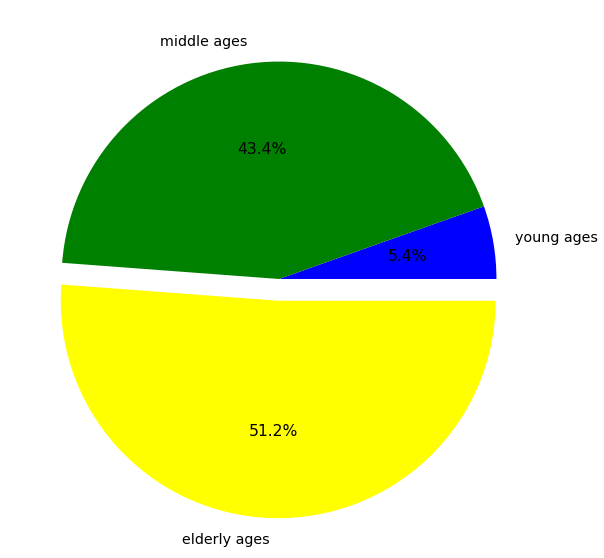

In [45]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],colors=colors,explode=explode,autopct="%1.1f%%")

2. Gender Analysis

C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

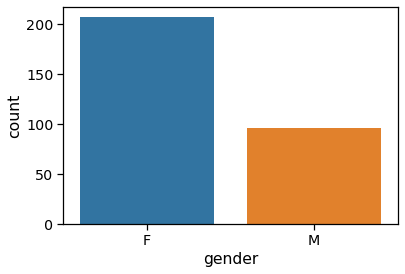

In [19]:
sns.countplot(df['gender'])

Ratio of Male to Female is approx 2:1.

C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

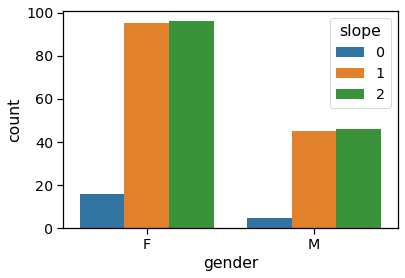

In [20]:
sns.countplot(df['gender'],hue=df["slope"])

slope is more for females

3. Chest Pain

C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chest_pain', ylabel='count'>

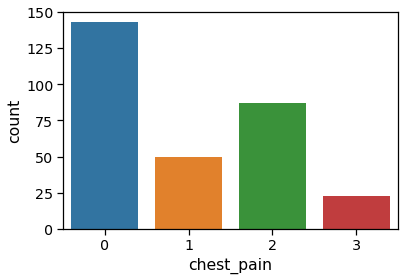

In [51]:
sns.countplot(df['chest_pain'])

there are 4 types of chest pain

1.status at least

2.condition slightly distressed

3.condition medium problem

4.condition too bad

C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chest_pain', ylabel='count'>

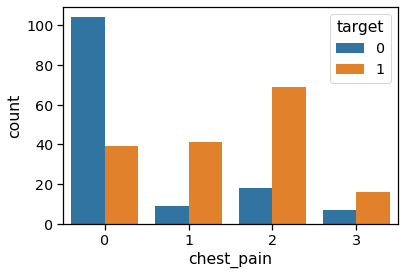

In [52]:
sns.countplot(df['chest_pain'],hue=df['target'])

C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chest_pain', ylabel='Density'>

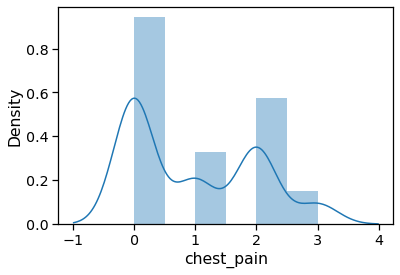

In [55]:
sns.distplot(df['chest_pain'])

People having the least chest pain are not likely to have heart disease.

People having severe chest pain are likely to have heart disease.

4.Thalach analysis

C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalach', ylabel='Density'>

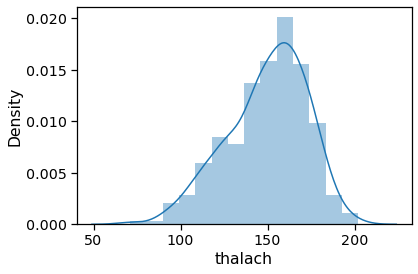

In [56]:
sns.distplot(df['thalach'])

5. thalassemia analysis

C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalassemia', ylabel='count'>

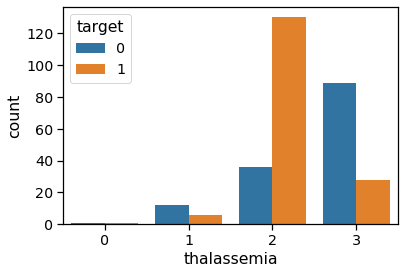

In [60]:
sns.countplot(df['thalassemia'],hue=df['target'])

In [61]:
df.corr()

,age,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
chest_pain,-0.068653,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slope,-0.168814,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877


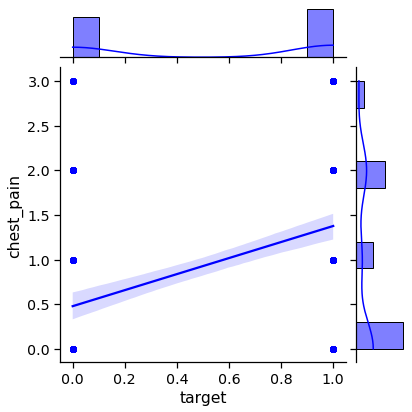

In [63]:
sns.jointplot(df['target'],df['chest_pain'],kind='reg',color='blue')

hence, shows that more is the chest pain more will be the chances of heart attack

C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


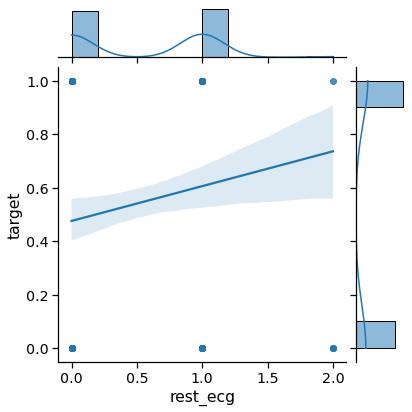

In [70]:
sns.jointplot(df['rest_ecg'],df['target'],kind='reg')

C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


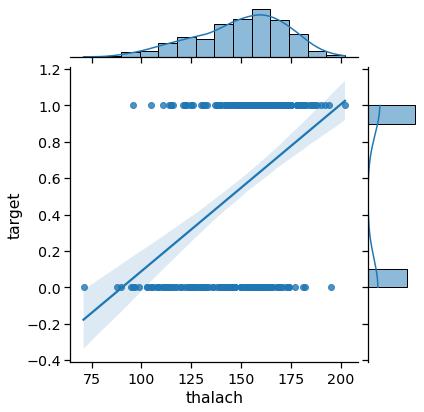

In [69]:
sns.jointplot(df['thalach'],df['target'],kind='reg')

C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


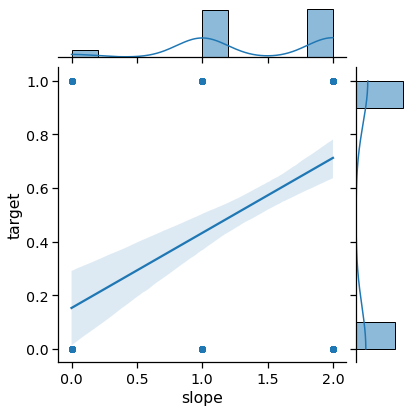

In [71]:
sns.jointplot(df['slope'],df['target'],kind='reg')

# Model Building

In [72]:
from sklearn.model_selection import train_test_split 

In [73]:
x=df.drop(['target','gender'],axis=1)

In [74]:
y=df['target']

# standardize the data to get better results

In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [78]:
X=sc.fit_transform(x)

In [80]:
x=X

In [81]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=19)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(242, 12) (61, 12) (242,) (61,)


# Decision Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
dtc=DecisionTreeClassifier(random_state=103,max_depth=50).fit(x_train,y_train)

In [164]:
y_pred=dtc.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [165]:
from sklearn.metrics import classification_report

In [166]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        29
           1       0.76      0.69      0.72        32

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [167]:
from sklearn.metrics  import confusion_matrix

In [168]:
print(confusion_matrix(y_test,y_pred))

[[22  7]
 [10 22]]


In [169]:
from sklearn.metrics import accuracy_score

In [170]:
dec=accuracy_score(y_pred,y_test)
dec

0.7213114754098361

# Grid Search

In [171]:
dict1={'criterion':['gini','entropy'],
      'splitter':['best','random'],
      'max_depth':range(50)}

In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
model=GridSearchCV(dtc,param_grid=dict1,cv=10,n_jobs=-1)

In [174]:
model.fit(x_train,y_train)

C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.69016667 0.71133333 0.6985     0.74816667
 0.74833333 0.71516667 0.77316667 0.79316667 0.72766667 0.79333333
 0.736      0.77283333 0.75666667 0.78916667 0.7525     0.76016667
 0.74833333 0.72733333 0.75666667 0.75616667 0.75666667 0.73966667
 0.75666667 0.75183333 0.75666667 0.74383333 0.75666667 0.75216667
 0.75666667 0.73966667 0.75666667 0.73966667 0.75666667 0.73966667
 0.75666667 0.73966667 0.75666667 0.73966667 0.75666667 0.73966667
 0.75666667 0.73966667 0.75666667 0.73966667 0.75666667 0.73966667
 0.75666667 0.73966667 0.75666667 0.73966667 0.75666667 0.73966667
 0.75666667 0.73966667 0.75666667 0.73966667 0.75666667 0.73966667
 0.75666667 0.73966667 0.75666667 0.73966667 0.75666667 0.73966667
 0.75666667 0.73966667 0.75666667 0.73966667 0.75666667 0.73966667
 0.75666667 0.73966667 0.75666667 0.73966667

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=50, random_state=103),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 50),
                         'splitter': ['best', 'random']})

In [175]:
model.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}

In [176]:
dtc1=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=6).fit(x_train,y_train)

In [177]:
y_pred1=dtc1.predict(x_test)
y_pred1

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [178]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.76      0.81      0.79        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [179]:
dec1=accuracy_score(y_pred1,y_test)
dec1

0.7704918032786885

# Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
model_=RandomForestClassifier(criterion='entropy',max_depth=10,random_state=104)

In [220]:
model_.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=104)

In [221]:
y_pred_=model_.predict(x_test)

In [222]:
ran_for=accuracy_score(y_pred_,y_test)
ran_for

0.7704918032786885

In [223]:
dict2={'criterion':['gini','enthropy'],
      'max_depth':range(50),
      'n_estimators':range(10)}

In [224]:
model1=GridSearchCV(model_,param_grid=dict2,cv=10,n_jobs=-1)

In [225]:
model1.fit(x_train,y_train)

C:\Users\SHUBHAM SHARMA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.756
 0.7645     0.8105     0.79383333 0.85183333 0.81833333 0.78983333
 0.77333333 0.79433333        nan 0.781      0.77266667 0.80616667
 0.79366667 0.831      0.83466667 0.82216667 0.806      0.81416667
        nan 0.72383333 0.728      0.77316667 0.7855     0.79783333
 0.82683333 0.81416667 0.81416667 0.8475            nan 0.7355
 0.7605     0.77266667 0.785      0.7975     0.80583333 0.7975
 0.79333333 0.78933333        nan 0.744      0.77666667 0.78066667
 0.78933333 0.806      0.76466667 0.76866667 0.781      0.798
        nan 0.74366667 0.73916667 0.789      0.78933333 0.81416667
 0.78933333 0.80216667 0.79383333 0.81033333        nan 0.71966667
 0.71483333 0.756      0.756      0.781      0.789      0.7933

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=10,
                                              random_state=104),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'enthropy'],
                         'max_depth': range(0, 50),
                         'n_estimators': range(0, 10)})

In [226]:
model1.best_params_

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 5}

In [227]:
model_=RandomForestClassifier(criterion='gini',max_depth=1,n_estimators=5,random_state=103)

In [228]:
model_.fit(x_train,y_train)

RandomForestClassifier(max_depth=1, n_estimators=5, random_state=103)

In [229]:
y_pred_1=model_.predict(x_test)

In [230]:
ran_for1=accuracy_score(y_pred_1,y_test)
ran_for1

0.6557377049180327

# Gradient Boosting Classifier

In [231]:
from sklearn.ensemble import GradientBoostingClassifier

In [232]:
gbc=GradientBoostingClassifier().fit(x_train,y_train)

In [233]:
y_pred3=gbc.predict(x_test)

In [234]:
a=accuracy_score(y_pred3,y_test)
a

0.7540983606557377

# create a dataframe of model and accuracy score 

In [235]:
columns=['Model','Accuracy_Score']

In [236]:
dff=pd.DataFrame(columns=columns)


In [237]:
analyse_data=pd.Series({'Model':'Decision_Tree',
                        'Accuracy_Score':dec})

In [238]:
dff=dff.append(analyse_data,ignore_index=True)
dff

,Model,Accuracy_Score
0,Decision_Tree,0.721311


In [239]:
#dff=dff.drop([1],axis=0)

In [240]:
dff

,Model,Accuracy_Score
0,Decision_Tree,0.721311


In [241]:
analyse_data1=pd.Series({'Model':'Decision_Tree_Grid_Search',
                        'Accuracy_Score':dec1})

In [242]:
dff=dff.append(analyse_data1,ignore_index=True)
dff

,Model,Accuracy_Score
0,Decision_Tree,0.721311
1,Decision_Tree_Grid_Search,0.770492


In [243]:
analyse_data2=pd.Series({'Model':'Random_Forest',
                        'Accuracy_Score':ran_for})

In [244]:
dff=dff.append(analyse_data2,ignore_index=True)
dff

,Model,Accuracy_Score
0,Decision_Tree,0.721311
1,Decision_Tree_Grid_Search,0.770492
2,Random_Forest,0.770492


In [245]:
analyse_data3=pd.Series({'Model':'Random_Forest_Grid_Search',
                        'Accuracy_Score':ran_for1})

In [246]:
dff=dff.append(analyse_data3,ignore_index=True)
dff

,Model,Accuracy_Score
0,Decision_Tree,0.721311
1,Decision_Tree_Grid_Search,0.770492
2,Random_Forest,0.770492
3,Random_Forest_Grid_Search,0.655738


In [247]:
analyse_data4=pd.Series({'Model':'Gradient_boosting',
                        'Accuracy_Score':a})

In [248]:
dff=dff.append(analyse_data4,ignore_index=True)
dff

,Model,Accuracy_Score
0,Decision_Tree,0.721311
1,Decision_Tree_Grid_Search,0.770492
2,Random_Forest,0.770492
3,Random_Forest_Grid_Search,0.655738
4,Gradient_boosting,0.754098


In [249]:
dff

,Model,Accuracy_Score
0,Decision_Tree,0.721311
1,Decision_Tree_Grid_Search,0.770492
2,Random_Forest,0.770492
3,Random_Forest_Grid_Search,0.655738
4,Gradient_boosting,0.754098


# Conclusion
1. We did data visualization and data analysis of the target variable, age features, and whatnot along with its univariate analysis and bivariate analysis.

model building.

2. From the above model accuracy, Random_Forest & Decision_Tree_Grid_Search is giving us the accuracy which is 77%.

